In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from crossval import cross_validate
from mlp import mlp_train, mlp_predict, logistic, nll
from kernelsvm import kernel_svm_train, kernel_svm_predict
from scipy.io import loadmat
from plotutils import plot_data, plot_surface
import copy

In [3]:
# load synthetic binary-class data from MATLAB data file

variables = dict()
loadmat('syntheticData.mat', variables)

# use some list comprehensions to clean up MATLAB data conversion
train_labels = [vector[0].ravel() for vector in variables['trainLabels']]
train_data = [matrix[0] for matrix in variables['trainData']]
test_labels = [vector[0].ravel() for vector in variables['testLabels']]
test_data = [matrix[0] for matrix in variables['testData']]

# set constants for convenience

num_datasets = len(train_labels)
num_models = 5
num_folds = 4

# initialize matrix to store test accuracies
test_accuracy = np.zeros((num_datasets, num_models))

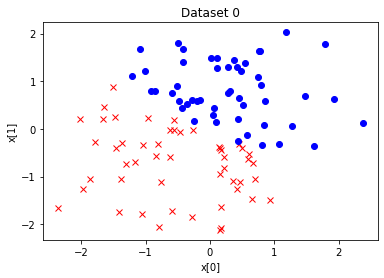

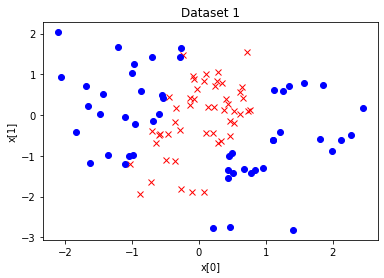

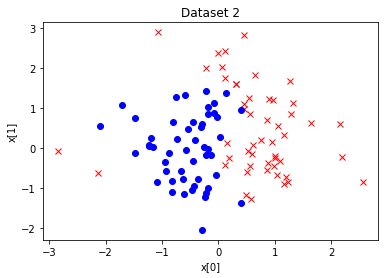

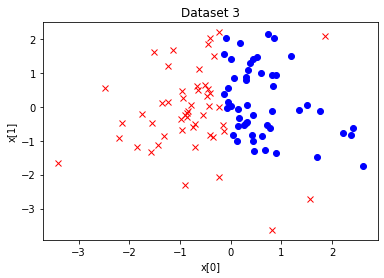

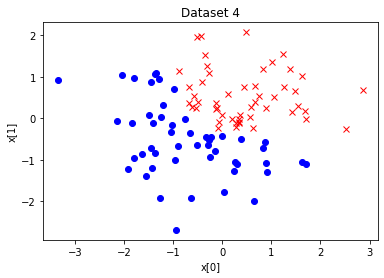

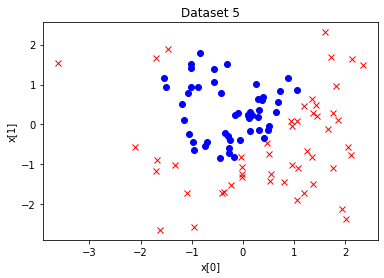

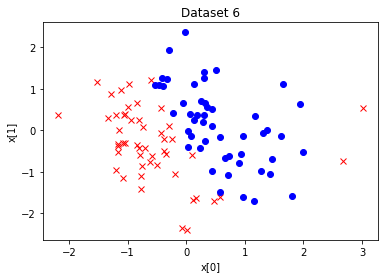

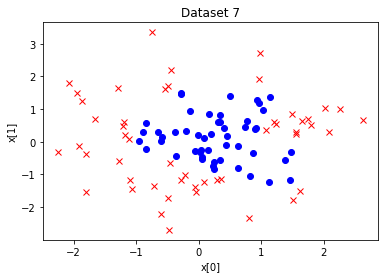

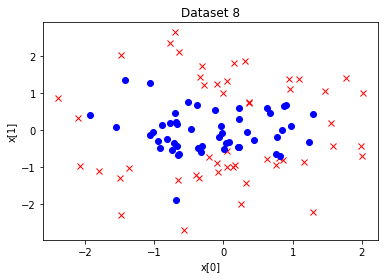

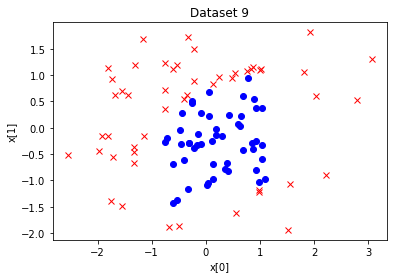

In [4]:
# plot training data

for i in range(num_datasets):
    plt.figure()
    plot_data(train_data[i], train_labels[i])
    plt.title('Dataset %d' % i)
    plt.xlabel('x[0]')
    plt.ylabel('x[1]')
    plt.show()

Exiting because total change was 8.380090e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.649176e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.242968e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.897578e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.965588e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.450227e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.770870e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.519558e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.618971e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.703867e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.506709e-09, a sign that we have reached a loc

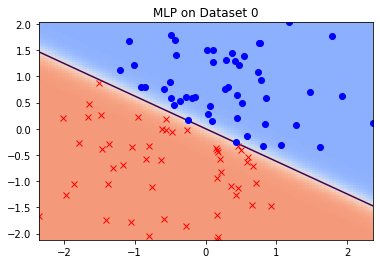

Exiting because total change was 9.865880e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.625470e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.276305e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.578631e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.567334e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.979710e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.492130e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.950993e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.197234e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.461312e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.577845e-09, a sign that we have reached a loc

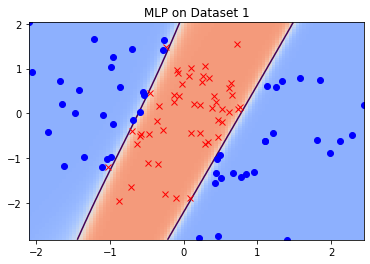

Exiting because total change was 9.407219e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.867778e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.805344e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.440298e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.287910e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.681628e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.735079e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.998398e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.766477e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.628503e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.843024e-09, a sign that we have reached a loc

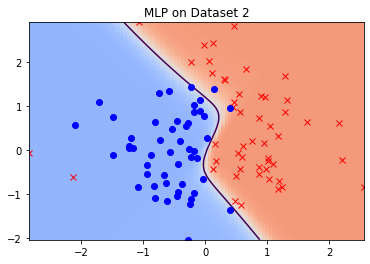

Exiting because total change was 7.804991e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.454200e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.395082e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.287533e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.493691e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.304725e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.940386e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.625873e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.672519e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.755926e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.954978e-09, a sign that we have reached a loc

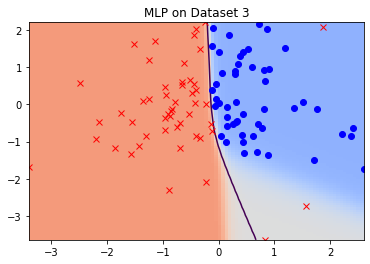

Exiting because total change was 9.428791e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.664976e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.418270e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.874718e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.679169e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.469496e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.719583e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.891302e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.817454e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.834181e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.593987e-09, a sign that we have reached a loc

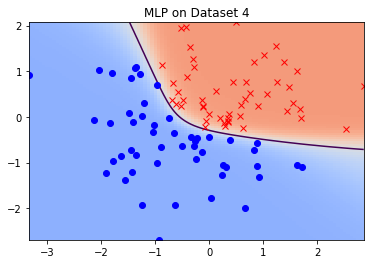

Exiting because total change was 8.499424e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.521210e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.352742e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.050141e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.700705e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.390755e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.860744e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.515129e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.732823e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.999724e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.804509e-09, a sign that we have reached a loc

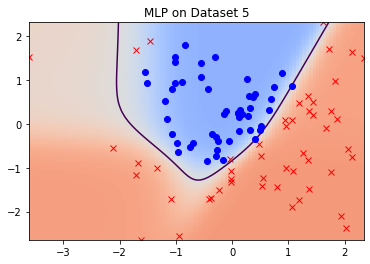

Exiting because total change was 9.513123e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.963483e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.709115e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.956309e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.777526e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.560745e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.535722e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.964368e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.825085e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.678317e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.899228e-09, a sign that we have reached a loc

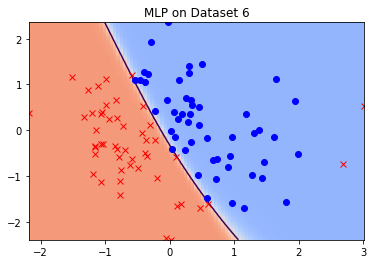

Exiting because total change was 9.438387e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.888868e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.336134e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.752477e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.318485e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.892944e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.983960e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.445448e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.474499e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.704048e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.868859e-09, a sign that we have reached a loc

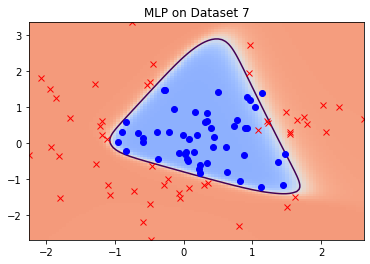

Exiting because total change was 8.900892e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.923094e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.597465e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.342199e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.958793e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.838054e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.497796e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.608334e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.868490e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.983797e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.760637e-09, a sign that we have reached a loc

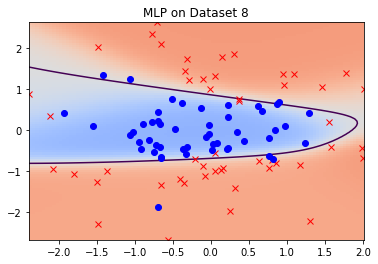

Exiting because total change was 9.128936e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.528823e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.967704e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.005913e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.560203e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.317902e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.171990e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.928435e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.828870e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.816227e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.655441e-09, a sign that we have reached a loc

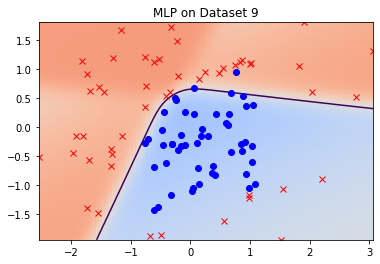

In [5]:
# run multi-layer perceptron with cross-validation to select model parameters and structure on all datasets
# this will take a few minutes

for i in range(num_datasets):
    structures = [[1], [4], [2, 2], [2, 4], [4, 4]]
    lambda_vals = [0.01, 0.1, 1]
    
    params = {
        'max_iter': 400,
        'activation_function': logistic,
        'loss_function': nll
    }
    
    best_params = []
    best_score = 0
    
    for j in range(len(structures)):
        for k in range(len(lambda_vals)):
            params['num_hidden_units']= structures[j]
            params['lambda'] = lambda_vals[k]
            
            cv_score, models = cross_validate(mlp_train, mlp_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = copy.copy(params)
                
    mlp_model = mlp_train(train_data[i], train_labels[i], best_params)
    predictions, _, _, _ = mlp_predict(test_data[i], mlp_model)
    test_accuracy[i, 0] = np.mean(predictions == test_labels[i])
    
    print("MLP had test accuracy %f on Dataset %d" % (test_accuracy[i, 0], i))
    print("with structure %s and lambda = %f" % (repr(best_params['num_hidden_units']), best_params['lambda']))
    
    plt.figure()
    plot_surface(mlp_predict, mlp_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('MLP on Dataset %d' % i)
    plt.show()

Linear SVM had test accuracy 0.989000 on Dataset 0
with C = 10.000000


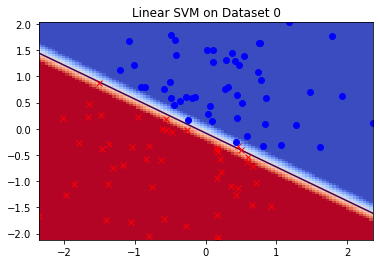

Linear SVM had test accuracy 0.508000 on Dataset 1
with C = 1.000000


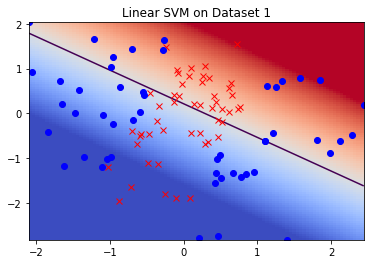

Linear SVM had test accuracy 0.869000 on Dataset 2
with C = 10.000000


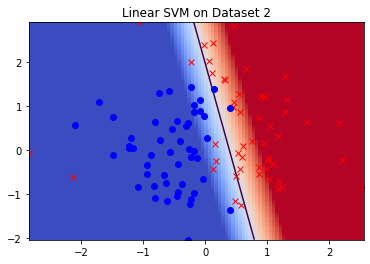

Linear SVM had test accuracy 0.966000 on Dataset 3
with C = 10.000000


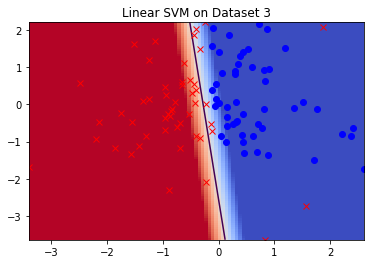

Linear SVM had test accuracy 0.878000 on Dataset 4
with C = 1.000000


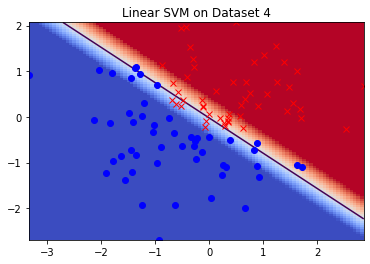

Linear SVM had test accuracy 0.817000 on Dataset 5
with C = 10.000000


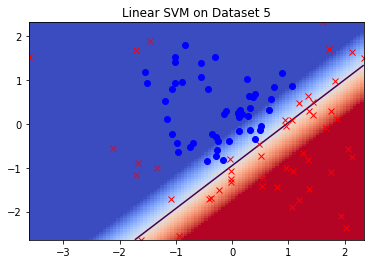

Linear SVM had test accuracy 0.929000 on Dataset 6
with C = 1.000000


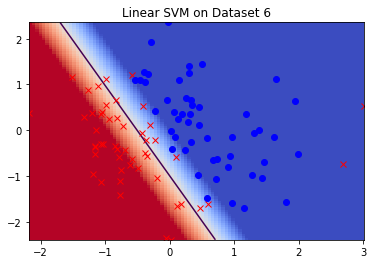

Linear SVM had test accuracy 0.732000 on Dataset 7
with C = 1.000000


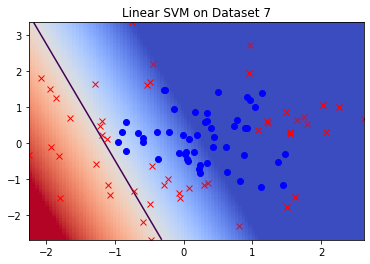

Linear SVM had test accuracy 0.522000 on Dataset 8
with C = 0.001000


D:\Swopnil\Dropbox\VT Spring 2020\HW3_programming_April6\plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


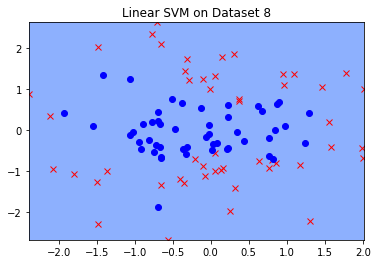

Linear SVM had test accuracy 0.734000 on Dataset 9
with C = 10.000000


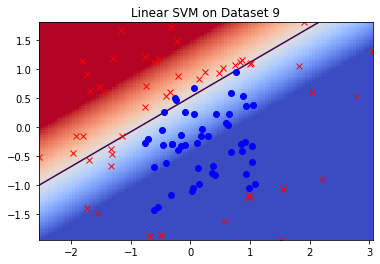

In [6]:
# run linear SVM

c_vals = 10 ** np.linspace(-3, 1, 5)


for i in range(num_datasets):
    best_params = []
    best_score = 0

    for j in range(len(c_vals)):
        params = {
            'kernel': 'linear',
            'C': c_vals[j]
        }
        
        cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
        
        if cv_score > best_score:
            best_score = cv_score
            best_params = params
            
    lin_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], lin_svm_model)
    test_accuracy[i, 1] = np.mean(predictions == test_labels[i])
    
    print("Linear SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 1], i))
    print("with C = %f" % (best_params['C']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, lin_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('Linear SVM on Dataset %d' % i)
    plt.show()

Polynomial SVM had test accuracy 0.982000 on Dataset 0
with C = 1.000000, order = 3


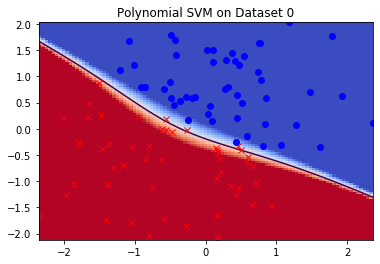

Polynomial SVM had test accuracy 0.967000 on Dataset 1
with C = 10.000000, order = 4


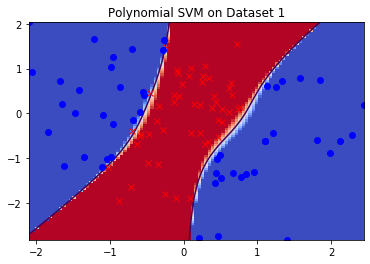

Polynomial SVM had test accuracy 0.945000 on Dataset 2
with C = 10.000000, order = 3


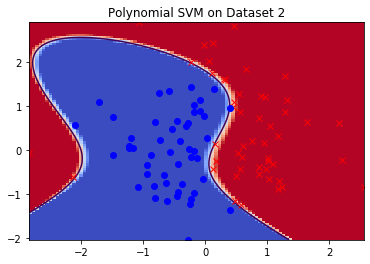

Polynomial SVM had test accuracy 0.938000 on Dataset 3
with C = 1.000000, order = 4


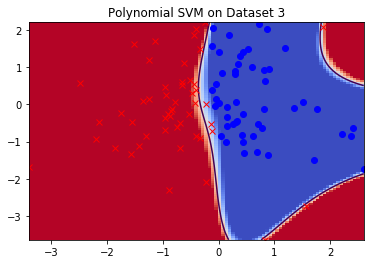

Polynomial SVM had test accuracy 0.960000 on Dataset 4
with C = 10.000000, order = 3


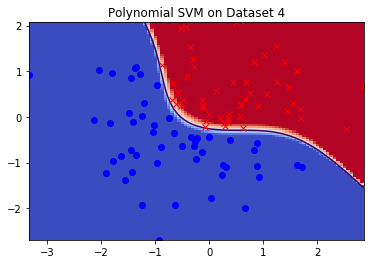

Polynomial SVM had test accuracy 0.941000 on Dataset 5
with C = 10.000000, order = 3


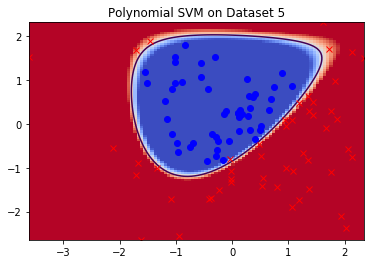

Polynomial SVM had test accuracy 0.940000 on Dataset 6
with C = 1.000000, order = 2


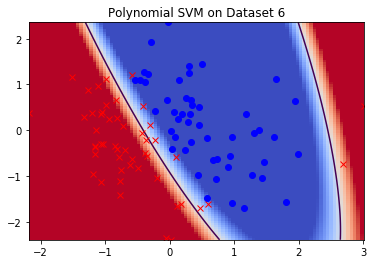

Polynomial SVM had test accuracy 0.930000 on Dataset 7
with C = 1.000000, order = 4


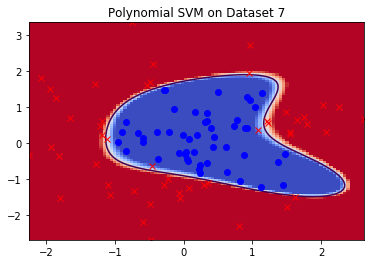

Polynomial SVM had test accuracy 0.896000 on Dataset 8
with C = 10.000000, order = 4


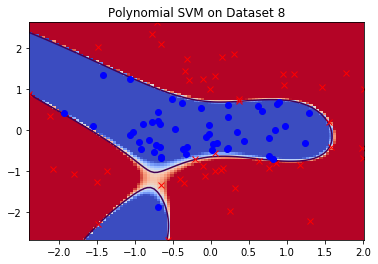

Polynomial SVM had test accuracy 0.938000 on Dataset 9
with C = 10.000000, order = 2


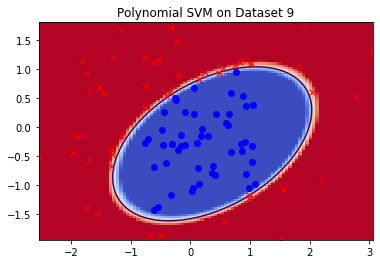

In [7]:
# run polynomial SVM

c_vals = 10 ** np.linspace(-3, 1, 5)
orders = [2, 3, 4]

for i in range(num_datasets):
    best_params = []
    best_score = 0
    
    for j in range(len(c_vals)):
        for k in range(len(orders)):
            params = {
                'kernel': 'polynomial',
                'C': c_vals[j],
                'order': orders[k]
            }
            
            cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = params
            
    poly_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], poly_svm_model)
    test_accuracy[i, 2] = np.mean(predictions == test_labels[i])
    
    print("Polynomial SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 2], i))
    print("with C = %f, order = %d" % (best_params['C'], best_params['order']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, poly_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('Polynomial SVM on Dataset %d' % i)
    plt.show()

RBF SVM had test accuracy 0.968000 on Dataset 0
with C = 100.000000, sigma = 1.300000


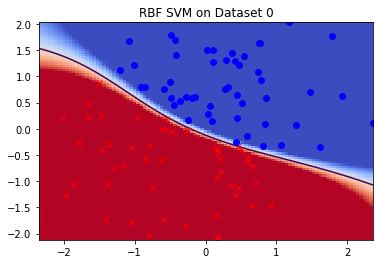

RBF SVM had test accuracy 0.932000 on Dataset 1
with C = 1.000000, sigma = 0.500000


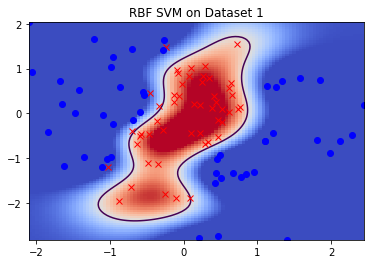

RBF SVM had test accuracy 0.935000 on Dataset 2
with C = 10.000000, sigma = 0.400000


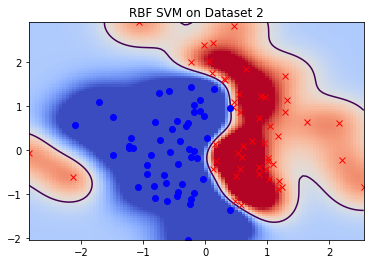

RBF SVM had test accuracy 0.947000 on Dataset 3
with C = 100.000000, sigma = 0.600000


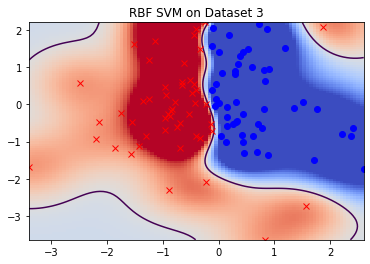

RBF SVM had test accuracy 0.943000 on Dataset 4
with C = 1.000000, sigma = 1.200000


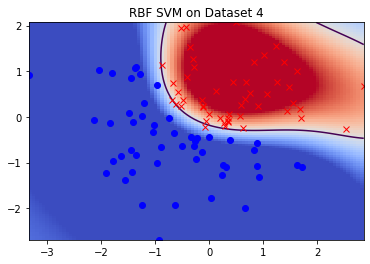

RBF SVM had test accuracy 0.939000 on Dataset 5
with C = 100.000000, sigma = 1.300000


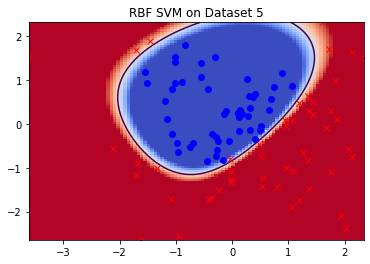

RBF SVM had test accuracy 0.964000 on Dataset 6
with C = 1.000000, sigma = 1.200000


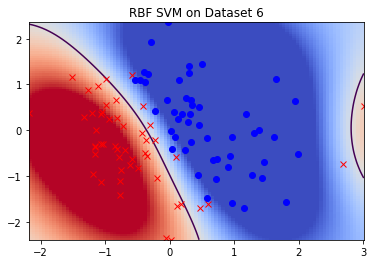

RBF SVM had test accuracy 0.960000 on Dataset 7
with C = 100.000000, sigma = 0.700000


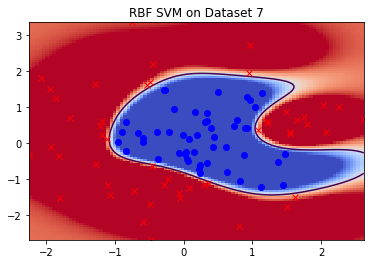

RBF SVM had test accuracy 0.918000 on Dataset 8
with C = 100.000000, sigma = 0.400000


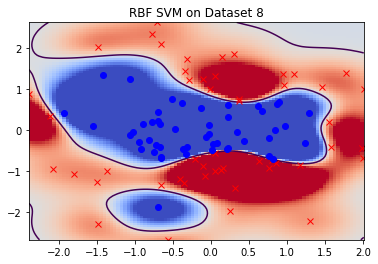

RBF SVM had test accuracy 0.924000 on Dataset 9
with C = 10.000000, sigma = 0.300000


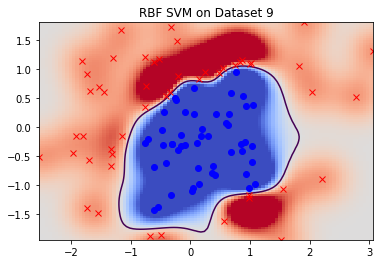

In [8]:
# run RBF SVM

c_vals = 10 ** np.linspace(-3, 3, 7)
sigmas = np.linspace(0.1, 1.5, 15)


for i in range(num_datasets):
    best_params = []
    best_score = 0

    for j in range(len(c_vals)):
        for k in range(len(sigmas)):
            params = {
                'kernel': 'rbf',
                'C': c_vals[j],
                'sigma': sigmas[k]
            }
            
            cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = params
                
    rbf_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], rbf_svm_model)
    test_accuracy[i, 3] = np.mean(predictions == test_labels[i])
    
    print("RBF SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 3], i))
    print("with C = %f, sigma = %f" % (best_params['C'], best_params['sigma']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, rbf_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('RBF SVM on Dataset %d' % i)
    plt.show()

In [9]:
# print accuracy table

methods = ['MLP\t', 'LinSVM\t', 'PolySVM\t', 'RBFSVM\t']

print((" " * 10) + "TEST ACCURACIES (Percent)")
print("-" * 50)

print("Set\t   " + "   ".join(["%d" % number for number in range(num_datasets)]))
print("-" * 50)
for i in range(len(methods)):
    line = [methods[i]]
    for j in range(num_datasets):
        line += ["%d" % (100 * test_accuracy[j, i])]
    print("  ".join(line))

          TEST ACCURACIES (Percent)
--------------------------------------------------
Set	   0   1   2   3   4   5   6   7   8   9
--------------------------------------------------
MLP	  98  97  90  95  95  88  98  92  89  82
LinSVM	  98  50  86  96  87  81  92  73  52  73
PolySVM	  98  96  94  93  96  94  94  93  89  93
RBFSVM	  96  93  93  94  94  93  96  96  91  92
